<a href="https://colab.research.google.com/github/Coxmin27/Tema2_IA/blob/main/Lab2/regressions_naive_bayes_explained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laborator

**Sarcină:** Dezbateți și adnotați rezolvările problemelor

## Regresie polinomială

### Cerință

Un magazin de înghețată vrea să prezică vânzările zilnice în funcție de temperatură.

Date:
- Temperatură (&deg;C): `[15, 18, 20, 22, 25, 27, 30, 32, 35, 37, 40]`
- Vânzări (unități): `[20, 35, 50, 70, 100, 130, 170, 190, 220, 235, 250]`

Sarcini:
1. Vizualizarea datelor (linear vs curved)
2. Antrenarea modelelor de regresie polinomială de grad 1, 2 și 3
3. Calculare MAE, MSE, RMSE și R<sup>2</sup>
4. Determinare ce temperatură e optimă
5. Predicție pentru 28&deg;C
6. Discuție overfitting vs underfitting

### Rezolvare

Importăm bibliotecile necesare.

In [ ]:
import matplotlib.pyplot as plt  # pentru grafice
import numpy as np  # pentru calcul algebric
from sklearn.linear_model import LinearRegression  # algoritmul principal de regresie
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # metrici de evaluare
from sklearn.preprocessing import PolynomialFeatures  # pentru diferitele grade polinomiale

Definim datele cu care vom lucra (din enunțul problemei).

In [ ]:
temperature = np.array([15, 18, 20, 22, 25, 27, 30, 32, 35, 37, 40]).reshape(-1, 1)  # temperaturile
sales = np.array([20, 35, 50, 70, 100, 130, 170, 190, 220, 235, 250])  # unitățile vândute

Trasăm grafic punctele din textul problemei pentru vizualizare.

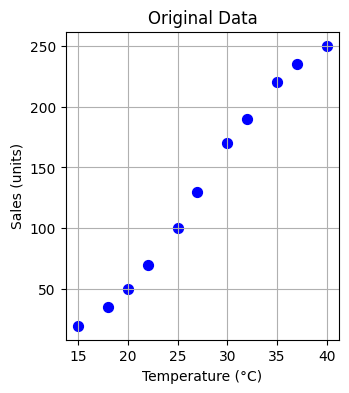

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(temperature, sales, color="blue", s=50)
plt.xlabel("Temperature (°C)")
plt.ylabel("Sales (units)")
plt.title("Original Data")
plt.grid(True)

Pregătim variabilele necesare pentru antrenarea, salvarea și utilizarea modelelor de regresie polinomială.

In [ ]:
degrees = [1, 2, 3]  # vom calcula regresii polinomiale de ordinul 1, 2 și 3
models = {}  # salvăm modelele de regresie
predictions = {}  # salvăm predicțiile acestora

Definim o funcție care pentru un grad polinomial dat (1, 2, 3 etc.) crează și antrenează un model de regresie polinomială. După antrenare afișează graficul fiecărei funcții rezultate.

In [ ]:
# pentru antrenarea și salvarea a câte un model de regresie pentru fiecare grad
def train_and_plot(degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(temperature)  # transformarea datelor de intrare (temperaturilor într-o formă adecvată funcției polinomiale)

    model = LinearRegression()  # încărcarea modelului
    model.fit(X_poly, sales)  # antrenarea modelului
    models[degree] = (poly, model)  # salvarea modelului

    y_pred = model.predict(X_poly)  # generarea predicțiilor
    predictions[degree] = y_pred  # salvarea predicțiilor

    # calcularea metricilor de evaluare
    mae = mean_absolute_error(sales, y_pred)
    mse = mean_squared_error(sales, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(sales, y_pred)

    # afișarea metricilor de evaluare
    print(f"\n=== Polynomial Degree {degree} ===")
    print(f"MAE:  {mae:.2f}")
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.4f}")

    # afișarea coeficienților și a termenului liber a funcției
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_:.2f}")

    # pregătirea intervalelor de afișare pentru grafic
    temp_range = np.linspace(15, 40, 100).reshape(-1, 1)
    X_poly_range = poly.transform(temp_range)
    y_range = model.predict(X_poly_range)

    # afișarea graficului funcției
    plt.subplot(1, 3, degree)
    plt.scatter(temperature, sales, color="blue", s=50, label="Data")
    plt.plot(temp_range, y_range, color="red", linewidth=2, label=f"Degree {degree}")
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Sales (units)")
    plt.title(f"Degree {degree} (R²={r2:.4f})")
    plt.legend()
    plt.grid(True)

În continuare vom rula funcția pentru fiecare grad.


=== Polynomial Degree 1 ===
MAE:  7.72
MSE:  74.41
RMSE: 8.63
R²:   0.9884
Coefficients: [ 0.         10.21688877]
Intercept: -145.93


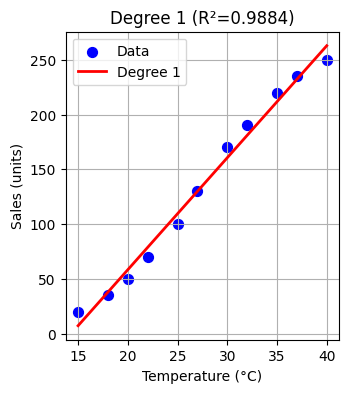

In [ ]:
plt.figure(figsize=(12, 4))  # pentru afișarea corectă a graficului
train_and_plot(1)

Funcția de gradul 1 este o dreaptă. După antrenare aceasta este $f(x) = - 145.93 + 10.21688877 * x$.


=== Polynomial Degree 2 ===
MAE:  7.72
MSE:  74.38
RMSE: 8.62
R²:   0.9884
Coefficients: [ 0.00000000e+00  1.03936742e+01 -3.21289922e-03]
Intercept: -148.17


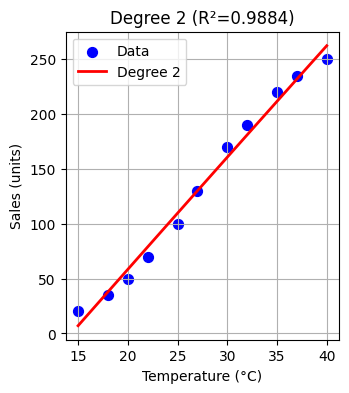

In [ ]:
plt.figure(figsize=(12, 4))  # pentru afișarea corectă a graficului
train_and_plot(2)

Funcția de gradul 2 este o curbă. Modelul a învățat următorii coeficienț: $[0, 10.39..., -0.00321]$ și un intercept (termen liber) de $-148.17$. Aceștia corespund ecuației: $f(x) = -148.17 + 10.3936742 * x - 0.00321 * x ^ 2$.


=== Polynomial Degree 3 ===
MAE:  1.23
MSE:  2.94
RMSE: 1.71
R²:   0.9995
Coefficients: [ 0.00000000e+00 -3.81398155e+01  1.85092297e+00 -2.24771548e-02]
Intercept: 251.96


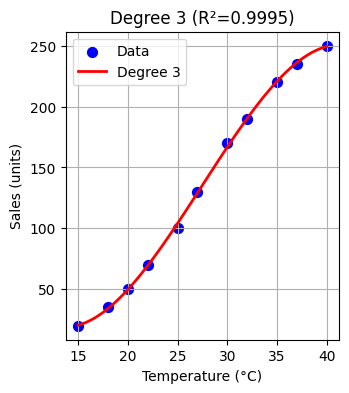

In [ ]:
plt.figure(figsize=(12, 4))  # pentru afișarea corectă a graficului
train_and_plot(3)

Funcția de gradul 3 este o curbă. După antrenare aceasta este $f(x) = 251.96 - 38.1398155 * x + 1.85092297 * x ^ 2 - 0.0224771548 * x ^ 3$.

Din coeficienți, valoarea erorilor și grafice se poate observa că funcțiile de gradul 1, respectiv 2 sunt aproape identice pe intervalul ales. Pentru această problemă, regresia polinomială de gradul 3 este mai potrivită. Totuși, pe un interval mai larg se poate observa overfitting-ul acesteia.

Pentru fiecare model de regresie polinomială creată și salvată în `models` generăm o predicție pentru 28&deg;C.

In [ ]:
print("\n=== Prediction for 28°C ===")
for degree in degrees:
    poly, model = models[degree]
    temp_28 = poly.transform([[28]])
    pred_28 = model.predict(temp_28)[0]
    print(f"Degree {degree}: {pred_28:.2f} units")


=== Prediction for 28°C ===
Degree 1: 140.14 units
Degree 2: 140.33 units
Degree 3: 141.75 units


## Regresie logistică

### Cerință

Dorim să prezicem dacă un student va promova un examen în funcție de orele de studiu.

Date:
- Ore studiate: `[1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10]`
- Promovat (1=Da, 0=Nu) : `[0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]`

Sarcini:
1. Vizualizarea datelor
2. Antrenarea modelelor de regresie logistică
3. Trasarea curbei sigmoid
4. Calcularea matricii de confuzie, acurateții, preciziei, recall-ului și scorului F1
5. Predicție pentru un student care a studiat 4 ore
6. Găsirea orelor de studiu necesare pentru 90% șanse de a promova

### Rezolvare

Importăm bibliotecile necesare.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression  # algoritmul principal de regresie
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score  # metrici de evaluare
import seaborn as sns  # aspect grafice

ModuleNotFoundError: No module named 'seaborn'

Definim datele cu care vom lucra (din enunțul problemei).

In [ ]:
hours = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10]).reshape(-1, 1)  # orele de studiu
passed = np.array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])  # promovat: 1 = da, 0 = nu

Afișăm grafic datele problemei.

([<matplotlib.axis.YTick at 0x297bf6e7750>,
 [Text(0, 0, 'Failed'), Text(0, 1, 'Passed')])

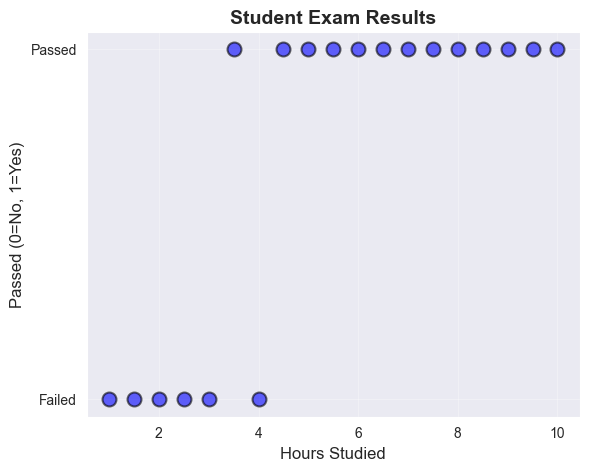

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(hours, passed, color='blue', s=100, alpha=0.6, edgecolors='black', linewidths=1.5)
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Passed (0=No, 1=Yes)', fontsize=12)
plt.title('Student Exam Results', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.yticks([0, 1], ['Failed', 'Passed'])

Creăm și antrenăm modelul.

In [ ]:
model = LogisticRegression()
model.fit(hours, passed)

NameError: name 'LogisticRegression' is not defined

Afișăm formula rezultată după antrenare și coeficienții acesteia.

In [ ]:
b0 = model.intercept_[0]
b1 = model.coef_[0][0]
print(f"Model Coefficients:")
print(f"  Intercept (b0): {b0:.4f}")
print(f"  Coefficient (b1): {b1:.4f}")
print(f"\nModel equation: P(pass) = 1 / (1 + e^(-({b0:.4f} + {b1:.4f} * hours)))")

Model Coefficients:
  Intercept (b0): -4.9077
  Coefficient (b1): 1.3138

Model equation: P(pass) = 1 / (1 + e^(-(-4.9077 + 1.3138 * hours)))


Generăm predicțiile și afișăm graficul funcției.

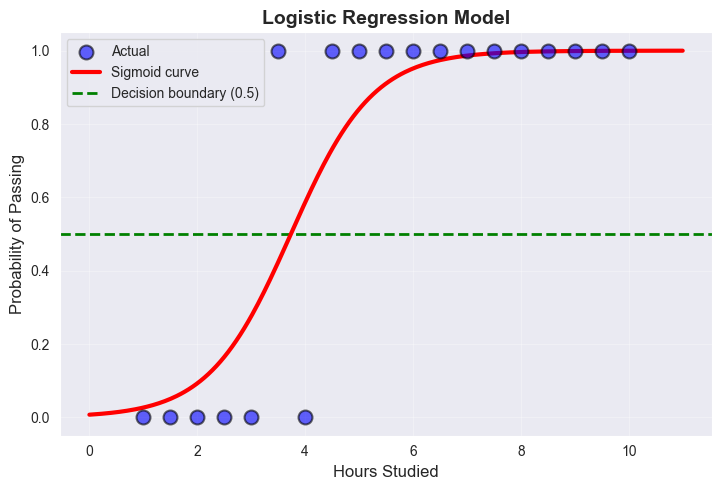

In [ ]:
plt.figure(figsize=(14, 5))

hours_range = np.linspace(0, 11, 300).reshape(-1, 1)
probabilities = model.predict_proba(hours_range)[:, 1]

y_pred = model.predict(hours)

plt.subplot(1, 2, 2)
plt.scatter(hours, passed, color='blue', s=100, alpha=0.6, label='Actual',
            edgecolors='black', linewidths=1.5, zorder=3)
plt.plot(hours_range, probabilities, color='red', linewidth=3, label='Sigmoid curve', zorder=2)
plt.axhline(y=0.5, color='green', linestyle='--', linewidth=2, label='Decision boundary (0.5)', zorder=1)
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Probability of Passing', fontsize=12)
plt.title('Logistic Regression Model', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Generăm matricea de confuzie și o afișăm.


CONFUSION MATRIX

                Predicted
              Fail (0)  Pass (1)
Actual Fail       5         1
Actual Pass       1        12


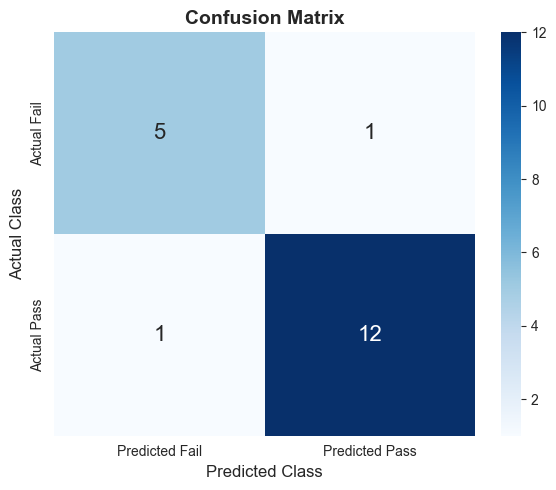

In [ ]:
cm = confusion_matrix(passed, y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"\n{'=' * 50}")
print("CONFUSION MATRIX")
print(f"{'=' * 50}")
print(f"\n                Predicted")
print(f"              Fail (0)  Pass (1)")
print(f"Actual Fail    {tn:4d}      {fp:4d}")
print(f"Actual Pass    {fn:4d}      {tp:4d}")

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Predicted Fail', 'Predicted Pass'],
            yticklabels=['Actual Fail', 'Actual Pass'],
            annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.tight_layout()
plt.show()

Calculăm metricile de evaluare și le afișăm.

In [ ]:
accuracy = accuracy_score(passed, y_pred)
precision = precision_score(passed, y_pred)
recall = recall_score(passed, y_pred)
f1 = f1_score(passed, y_pred)

print(f"{'=' * 50}")
print("PERFORMANCE METRICS")
print(f"{'=' * 50}")
print(f"True Positives (TP):   {tp}")
print(f"True Negatives (TN):   {tn}")
print(f"False Positives (FP):  {fp}")
print(f"False Negatives (FN):  {fn}")
print(f"\nAccuracy:  {accuracy:.4f} ({accuracy * 100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision * 100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall * 100:.2f}%)")
print(f"F1-Score:  {f1:.4f}")

PERFORMANCE METRICS
True Positives (TP):   12
True Negatives (TN):   5
False Positives (FP):  1
False Negatives (FN):  1

Accuracy:  0.8947 (89.47%)
Precision: 0.9231 (92.31%)
Recall:    0.9231 (92.31%)
F1-Score:  0.9231


Prezentăm interpretarea metricilor.

In [ ]:
print(f"{'=' * 50}")
print("INTERPRETATION")
print(f"{'=' * 50}")
print(f"Accuracy:  {accuracy * 100:.2f}% of all predictions are correct")
print(f"Precision: {precision * 100:.2f}% of predicted passes are actual passes")
print(f"Recall:    {recall * 100:.2f}% of actual passes were correctly identified")
print(f"F1-Score:  {f1:.4f} (harmonic mean of precision and recall)")

INTERPRETATION
Accuracy:  89.47% of all predictions are correct
Precision: 92.31% of predicted passes are actual passes
Recall:    92.31% of actual passes were correctly identified
F1-Score:  0.9231 (harmonic mean of precision and recall)


Calculăm predicția pentru 4 ore de studiu.

In [ ]:
hours_4 = np.array([[4]])
prob_4 = model.predict_proba(hours_4)[0, 1]
pred_4 = model.predict(hours_4)[0]

print(f"{'=' * 50}")
print("PREDICTION FOR 4 HOURS OF STUDY")
print(f"{'=' * 50}")
print(f"Probability of passing: {prob_4:.4f} ({prob_4 * 100:.2f}%)")
print(f"Prediction: {'PASS' if pred_4 == 1 else 'FAIL'}")

PREDICTION FOR 4 HOURS OF STUDY
Probability of passing: 0.5860 (58.60%)
Prediction: PASS


Calculăm orele de studiu necesare pentru o șansă de 90% de a promova.

In [ ]:
hours_90 = (np.log(0.9 / 0.1) - b0) / b1
prob_90_check = model.predict_proba([[hours_90]])[0, 1]

print(f"{'=' * 50}")
print("HOURS NEEDED FOR 90% PASS PROBABILITY")
print(f"{'=' * 50}")
print(f"Hours needed: {hours_90:.2f}")
print(f"Verification: {prob_90_check:.4f} ({prob_90_check * 100:.2f}%)")

HOURS NEEDED FOR 90% PASS PROBABILITY
Hours needed: 5.41
Verification: 0.9000 (90.00%)


Calculăm și afișăm probabilitățile de promovare pentru diferite ore de studiu.

In [ ]:
print(f"{'=' * 50}")
print("PASS PROBABILITIES FOR DIFFERENT STUDY HOURS")
print(f"{'=' * 50}")
for h in [2, 4, 6, 8]:
    prob = model.predict_proba([[h]])[0, 1]
    print(f"{h} hours: {prob:.4f} ({prob * 100:.2f}%)")

PASS PROBABILITIES FOR DIFFERENT STUDY HOURS
2 hours: 0.0928 (9.28%)
4 hours: 0.5860 (58.60%)
6 hours: 0.9514 (95.14%)
8 hours: 0.9963 (99.63%)


## Clasificator Naive Bayes

### Cerință

Prezicerea posibilității practicării sporturilor în funcție de vreme (din curs).

Date:
|Nr| Vreme | Temperatură | Umiditate | Vânt | Joc |
|--|---------|------------|----------|------|------|
|1| Soare | Mare | Mare | Absent | Nu |
|2| Soare | Mare | Mare | Prezent | Nu |
|3| înnorat | Mare | Mare | Absent | Da |
|4| Ploaie | Medie | Mare | Absent | Da |
|5| Ploaie | Mica | Normal | Absent | Da |
|6| Ploaie | Mica | Normal | Prezent | Nu |
|7| înnorat | Mica | Normal | Prezent | Da |
|8| Soare | Medie | Mare | Absent | Nu |
|9| Soare | Mica | Normal | Absent | Da |
|10| Ploaie | Medie | Normal | Absent | Da |
|11| Soare | Medie | Normal | Prezent | Da |
|12| înnorat | Medie | Mare | Prezent | Da |
|13| înnorat | Mare | Normal | Absent | Da |
|14| Ploaie | Medie | Mare | Prezent | Nu |

Predicție nouă: Vreme=Soare, Temperatură=Mare, Umiditate=Normală, Vânt=Absent

Sarcini:
1. Calculare prior posibility P(Play=Yes) și P(Play=No)
2. Calculare probabilități condiționale pentru fiecare atribut
3. Aplicare formulă Naive Bayes
4. Caculare predicții și afișare probabilități
5. Calculare matrice de confuzie și toate metricile folosind datele de antrenament
6. Discuție Laplace smoothing

### Rezolvare

Importăm bibliotecile necesare.

In [ ]:
import numpy as np
import pandas as pd  # pentru tabele de date (dataframes)
from sklearn.naive_bayes import CategoricalNB  # algoritmul de clasificare bazat pe formula Naive Bayes
from sklearn.preprocessing import LabelEncoder  # pentru transformarea datelor din forma de cuvinte în valori numerice
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

Definim datele problemei.

In [ ]:
data = {
    'Weather': ['Sunny', 'Sunny', 'Cloudy', 'Rain', 'Rain', 'Rain', 'Cloudy',
                'Sunny', 'Sunny', 'Rain', 'Sunny', 'Cloudy', 'Cloudy', 'Rain'],
    'Temperature': ['High', 'High', 'High', 'Medium', 'Low', 'Low', 'Low',
                    'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'Medium'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
                 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
             'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes'],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
             'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

Creăm un dataframe cu setul de date și îl afișăm împreună cu totalul.

In [ ]:
df = pd.DataFrame(data)
print("=" * 60)
print("DATASET")
print("=" * 60)
print(df.to_string(index=False))
print(f"\nTotal instances: {len(df)}")

DATASET
Weather Temperature Humidity Wind Play
  Sunny        High     High   No   No
  Sunny        High     High  Yes   No
 Cloudy        High     High   No  Yes
   Rain      Medium     High   No  Yes
   Rain         Low   Normal   No  Yes
   Rain         Low   Normal  Yes   No
 Cloudy         Low   Normal  Yes  Yes
  Sunny      Medium     High   No   No
  Sunny         Low   Normal   No  Yes
   Rain      Medium   Normal   No  Yes
  Sunny      Medium   Normal  Yes  Yes
 Cloudy      Medium     High  Yes  Yes
 Cloudy        High   Normal   No  Yes
   Rain      Medium     High  Yes   No

Total instances: 14


Numărăm câte instanțe se regăsesc în fiecare clasă (Yes or No play).

In [ ]:
print(f"{'=' * 60}")
print("MANUAL CALCULATION")
print(f"{'=' * 60}")

play_yes = df[df['Play'] == 'Yes']
play_no = df[df['Play'] == 'No']
total = len(df)

print(f"Class distribution:")
print(f"  Play = Yes: {len(play_yes)} instances")
print(f"  Play = No:  {len(play_no)} instances")

MANUAL CALCULATION
Class distribution:
  Play = Yes: 9 instances
  Play = No:  5 instances


Calculăm probabilitatea fiecărui rezultat.

In [ ]:
p_yes = len(play_yes) / total
p_no = len(play_no) / total

print(f"1. PRIOR PROBABILITIES:")
print(f"   P(Play=Yes) = {len(play_yes)}/{total} = {p_yes:.4f}")
print(f"   P(Play=No)  = {len(play_no)}/{total} = {p_no:.4f}")

1. PRIOR PROBABILITIES:
   P(Play=Yes) = 9/14 = 0.6429
   P(Play=No)  = 5/14 = 0.3571


Definim noua instanță pe care vrem să o clasificăm.

In [ ]:
new_instance = {
    'Weather': 'Sunny',
    'Temperature': 'High',
    'Humidity': 'Normal',
    'Wind': 'No'
}

print(f"2. NEW INSTANCE TO CLASSIFY:")
for key, value in new_instance.items():
    print(f"   {key}: {value}")

2. NEW INSTANCE TO CLASSIFY:
   Weather: Sunny
   Temperature: High
   Humidity: Normal
   Wind: No


Calculăm probabilitatea condițională pentru fiecare caracteristică (feature) de intrare.

In [ ]:
print(f"3. CONDITIONAL PROBABILITIES for Play=Yes:")
# din zilele în care s-a jucat ...
p_sunny_yes = len(play_yes[play_yes['Weather'] == 'Sunny']) / len(play_yes)  # în câte a fost soare?
p_high_yes = len(play_yes[play_yes['Temperature'] == 'High']) / len(play_yes)  # în câte a fost temperatură mare?
p_normal_yes = len(play_yes[play_yes['Humidity'] == 'Normal']) / len(play_yes)  # în câte a fost umiditate normală?
p_no_wind_yes = len(play_yes[play_yes['Wind'] == 'No']) / len(play_yes)  # în câte nu a fost vânt?

print(f"   P(Sunny|Yes)   = {len(play_yes[play_yes['Weather'] == 'Sunny'])}/{len(play_yes)} = {p_sunny_yes:.4f}")
print(f"   P(High|Yes)    = {len(play_yes[play_yes['Temperature'] == 'High'])}/{len(play_yes)} = {p_high_yes:.4f}")
print(f"   P(Normal|Yes)  = {len(play_yes[play_yes['Humidity'] == 'Normal'])}/{len(play_yes)} = {p_normal_yes:.4f}")
print(f"   P(No wind|Yes) = {len(play_yes[play_yes['Wind'] == 'No'])}/{len(play_yes)} = {p_no_wind_yes:.4f}")

print(f"\n4. CONDITIONAL PROBABILITIES for Play=No:")
# din zilele în care NU s-a jucat ...
p_sunny_no = len(play_no[play_no['Weather'] == 'Sunny']) / len(play_no)  # în câte a fost soare?
p_high_no = len(play_no[play_no['Temperature'] == 'High']) / len(play_no)  # în câte a fost temperatură mare?
p_normal_no = len(play_no[play_no['Humidity'] == 'Normal']) / len(play_no)  # în câte a fost umiditate normală?
p_no_wind_no = len(play_no[play_no['Wind'] == 'No']) / len(play_no)  # în câte nu a fost vânt?

print(f"   P(Sunny|No)   = {len(play_no[play_no['Weather'] == 'Sunny'])}/{len(play_no)} = {p_sunny_no:.4f}")
print(f"   P(High|No)    = {len(play_no[play_no['Temperature'] == 'High'])}/{len(play_no)} = {p_high_no:.4f}")
print(f"   P(Normal|No)  = {len(play_no[play_no['Humidity'] == 'Normal'])}/{len(play_no)} = {p_normal_no:.4f}")
print(f"   P(No wind|No) = {len(play_no[play_no['Wind'] == 'No'])}/{len(play_no)} = {p_no_wind_no:.4f}")

3. CONDITIONAL PROBABILITIES for Play=Yes:
   P(Sunny|Yes)   = 2/9 = 0.2222
   P(High|Yes)    = 2/9 = 0.2222
   P(Normal|Yes)  = 6/9 = 0.6667
   P(No wind|Yes) = 6/9 = 0.6667

4. CONDITIONAL PROBABILITIES for Play=No:
   P(Sunny|No)   = 3/5 = 0.6000
   P(High|No)    = 2/5 = 0.4000
   P(Normal|No)  = 1/5 = 0.2000
   P(No wind|No) = 2/5 = 0.4000


Aplicăm formula Naive Bayes pentru noua instanță.

In [ ]:
prob_yes = p_yes * p_sunny_yes * p_high_yes * p_normal_yes * p_no_wind_yes
prob_no = p_no * p_sunny_no * p_high_no * p_normal_no * p_no_wind_no

print(f"5. NAIVE BAYES CALCULATION:")
print(f"   P(Yes|X) ∝ {p_yes:.4f} × {p_sunny_yes:.4f} × {p_high_yes:.4f} × {p_normal_yes:.4f} × {p_no_wind_yes:.4f}")
print(f"           = {prob_yes:.6f}")
print(f"\n   P(No|X)  ∝ {p_no:.4f} × {p_sunny_no:.4f} × {p_high_no:.4f} × {p_normal_no:.4f} × {p_no_wind_no:.4f}")
print(f"           = {prob_no:.6f}")

5. NAIVE BAYES CALCULATION:
   P(Yes|X) ∝ 0.6429 × 0.2222 × 0.2222 × 0.6667 × 0.6667
           = 0.014109

   P(No|X)  ∝ 0.3571 × 0.6000 × 0.4000 × 0.2000 × 0.4000
           = 0.006857


Calculăm probabilitățile normalizate.

In [ ]:
total_prob = prob_yes + prob_no
prob_yes_norm = prob_yes / total_prob
prob_no_norm = prob_no / total_prob

print(f"6. NORMALIZED PROBABILITIES:")
print(f"   P(Yes|X) = {prob_yes:.6f} / {total_prob:.6f} = {prob_yes_norm:.4f} ({prob_yes_norm * 100:.2f}%)")
print(f"   P(No|X)  = {prob_no:.6f} / {total_prob:.6f} = {prob_no_norm:.4f} ({prob_no_norm * 100:.2f}%)")

6. NORMALIZED PROBABILITIES:
   P(Yes|X) = 0.014109 / 0.020966 = 0.6729 (67.29%)
   P(No|X)  = 0.006857 / 0.020966 = 0.3271 (32.71%)


Afișăm predicția calculată manual.

In [ ]:
prediction_manual = 'Yes' if prob_yes > prob_no else 'No'
print(f"7. PREDICTION: Play = {prediction_manual}")
print(f"   (Since P(Yes|X) {'>' if prob_yes > prob_no else '<'} P(No|X))")

7. PREDICTION: Play = Yes
   (Since P(Yes|X) > P(No|X))


Testăm folosind algoritmul Naive Bayes definit în `scikit-learn`.

In [ ]:
print(f"{'=' * 60}")
print("SKLEARN IMPLEMENTATION")
print(f"{'=' * 60}")

le_dict = {}
df_encoded = df.copy()

for column in df.columns:
    le = LabelEncoder()  # încarcă LabelEncoder-ul (pentru transformarea cuvintelor în date numerice)
    df_encoded[column] = le.fit_transform(df[column])  # transformă datele
    le_dict[column] = le  # salvează coloana transformată

X = df_encoded.drop('Play', axis=1).values  # datele de intrare
y = df_encoded['Play'].values  # datele de ieșire (dacă s-a jucat sau nu)

nb_model = CategoricalNB()  # încarcă modelul de clasificare Naive Bayes
nb_model.fit(X, y)  # antrenează modelul

y_pred = nb_model.predict(X)  # calculează predicția

# codifică instanța nouă pe care dorim să o testăm
new_instance_encoded = []
for col in ['Weather', 'Temperature', 'Humidity', 'Wind']:
    value = new_instance[col]
    encoded_value = le_dict[col].transform([value])[0]
    new_instance_encoded.append(encoded_value)

new_instance_array = np.array([new_instance_encoded])
prediction_sklearn = nb_model.predict(new_instance_array)[0]  # calculează predicția
probabilities_sklearn = nb_model.predict_proba(new_instance_array)[0]  # calculează probabilitățile

prediction_label = le_dict['Play'].inverse_transform([prediction_sklearn])[0]  # transformă predicția numerică în cuvânt

print(f"\nPrediction for new instance: {prediction_label}")
print(f"Probabilities: No={probabilities_sklearn[0]:.4f}, Yes={probabilities_sklearn[1]:.4f}")

SKLEARN IMPLEMENTATION

Prediction for new instance: Yes
Probabilities: No=0.3351, Yes=0.6649


Calculăm și afișăm matricea de confuzie.

In [ ]:
cm = confusion_matrix(y, y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"{'=' * 60}")
print("CONFUSION MATRIX (Training Data)")
print(f"{'=' * 60}")
print(f"\n                Predicted")
print(f"              No      Yes")
print(f"Actual No     {tn:3d}     {fp:3d}")
print(f"Actual Yes    {fn:3d}     {tp:3d}")


CONFUSION MATRIX (Training Data)

                Predicted
              No      Yes
Actual No       4       1
Actual Yes      0       9


Calculăm și afișăm metricile de performanță.

In [ ]:
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f"{'=' * 60}")
print("PERFORMANCE METRICS")
print(f"{'=' * 60}")
print(f"True Positives (TP):   {tp}")
print(f"True Negatives (TN):   {tn}")
print(f"False Positives (FP):  {fp}")
print(f"False Negatives (FN):  {fn}")
print(f"\nAccuracy:  {accuracy:.4f} ({accuracy * 100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision * 100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall * 100:.2f}%)")
print(f"F1-Score:  {f1:.4f}")

PERFORMANCE METRICS
True Positives (TP):   9
True Negatives (TN):   4
False Positives (FP):  1
False Negatives (FN):  0

Accuracy:  0.9286 (92.86%)
Precision: 0.9000 (90.00%)
Recall:    1.0000 (100.00%)
F1-Score:  0.9474


Vizualizăm matricea de confuzie și metricile de performanță.

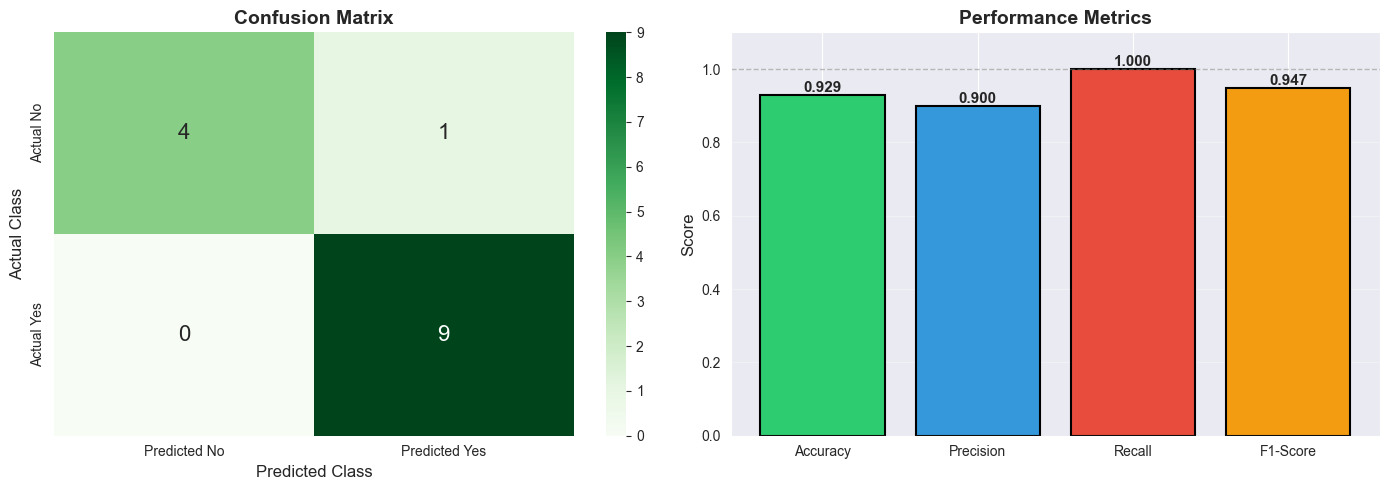

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=axes[0],
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'],
            annot_kws={"size": 16})
axes[0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Actual Class', fontsize=12)
axes[0].set_xlabel('Predicted Class', fontsize=12)

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [accuracy, precision, recall, f1]
colors = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12']

bars = axes[1].bar(metrics_names, metrics_values, color=colors, edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('Score', fontsize=12)
axes[1].set_title('Performance Metrics', fontsize=14, fontweight='bold')
axes[1].set_ylim(0, 1.1)
axes[1].axhline(y=1.0, color='gray', linestyle='--', linewidth=1, alpha=0.5)
axes[1].grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2., height,
                 f'{height:.3f}',
                 ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

Scurtă descriere Laplace smoothing

In [ ]:
print(f"\n{'=' * 60}")
print("LAPLACE SMOOTHING")
print(f"{'=' * 60}")
print("Laplace smoothing prevents zero probabilities when a feature")
print("value never appears with a certain class in the training data.")
print("\nFormula: P(x_i|c_j) = (n_ij + 1) / (n_j + c)")
print("  where n_ij = count of feature value in class")
print("        n_j = total count of class")
print("        c = number of classes")
print("\nExample: If 'Windy' weather never appeared with Play=Yes,")
print("without smoothing P(Windy|Yes) = 0, making P(Yes|X) = 0")
print("With smoothing: P(Windy|Yes) = (0+1)/(9+2) = 0.091")
print("\nThe sklearn CategoricalNB uses alpha parameter for smoothing.")
print(f"Current model alpha: {nb_model.alpha}")


LAPLACE SMOOTHING
Laplace smoothing prevents zero probabilities when a feature
value never appears with a certain class in the training data.

Formula: P(x_i|c_j) = (n_ij + 1) / (n_j + c)
  where n_ij = count of feature value in class
        n_j = total count of class
        c = number of classes

Example: If 'Windy' weather never appeared with Play=Yes,
without smoothing P(Windy|Yes) = 0, making P(Yes|X) = 0
With smoothing: P(Windy|Yes) = (0+1)/(9+2) = 0.091

The sklearn CategoricalNB uses alpha parameter for smoothing.
Current model alpha: 1.0


# Temă

**Sarcină:** Rezolvați și prezentați problemele următoare similar cu cele rezolvate la laborator.

Studenții de la specializarea Matematică informatică vor lucra în grupe de câte două persoane.

Fiecare student/ echipă este necesar să rezolve 2 probleme: Naive Bayes și una dintre regresii.
Pentru 2 puncte bonus (în caz de întârziere a temei) se vor rezolva toate 3 problemele.

## Regresie polinomială

Un fermier dorește să prezică randamentul de grâu în funcție de cantitatea de fertilizator utilizată.

Date:
- Fertilizator (kg/ hectar): `[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]`
- Randament (tone/ hectar): `[2.1, 2.8, 3.6, 4.5, 5.2, 5.8, 6.2, 6.4, 6.5, 6.4, 6.2, 5.9, 5.4, 4.8, 4.0]`

Notă: prea puțin fertilizator = randament mic; cantitate optimă = randament mare; prea mult = scădere randament.

Sarcini:
1. Împărțire date în seturi de antrenament (primele 12 puncte) și testare (ultimele 3 puncte)
2. Antrenare modele de regresie polinomială (grad 1, 2, 3 și 4)
3. Calculare MAE, MSE, RMSE și R<sup>2</sup> atât pentru datele de antrenare cât și testare
4. Identificarea cantității optime de fertilizator
5. Explicare care grad reprezintă cel mai bine realitatea
6. Vizualizarea tuturor modelelor și discutarea overfitting

Importul bibliotecilor necesare

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definirea setului de date
# Variabila independentă X: Cantitatea de fertilizator (kg/hectar)
X = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150])

# Variabila dependentă Y: Randamentul de grâu (tone/hectar)
Y = np.array([2.1, 2.8, 3.6, 4.5, 5.2, 5.8, 6.2, 6.4, 6.5, 6.4, 6.2, 5.9, 5.4, 4.8, 4.0])

# Reformatarea lui X: scikit-learn necesită ca variabila independentă să fie un tablou 2D
X = X.reshape(-1, 1)

print("Dimensiunea setului de date X:", X.shape)
print("Dimensiunea setului de date Y:", Y.shape)

Dimensiunea setului de date X: (15, 1)
Dimensiunea setului de date Y: (15,)


Împărțim datele în seturi de antrenament și testare manual

In [ ]:
# Primele 12 puncte pentru antrenament, ultimele 3 pentru testare.
n_train = 12

X_train = X[:n_train]
Y_train = Y[:n_train]

X_test = X[n_train:]
Y_test = Y[n_train:]

print("Puncte de antrenament (12): X_train.shape =", X_train.shape)
print("Puncte de testare (3): X_test.shape =", X_test.shape)
print("\n--- Punctele de Testare (pentru analiză Overfitting): ---")
print("Fertilizator (X_test):", X_test.flatten())
print("Randament real (Y_test):", Y_test)

Puncte de antrenament (12): X_train.shape = (12, 1)
Puncte de testare (3): X_test.shape = (3, 1)

--- Punctele de Testare (pentru analiză Overfitting): ---
Fertilizator (X_test): [130 140 150]
Randament real (Y_test): [5.4 4.8 4. ]


Vom crea o funcție ajutătoare pentru a calcula rapid toate metricile cerute

In [ ]:
# Dicționar pentru a stoca rezultatele
results = {}
DEGREES = [1, 2, 3, 4]

def evaluate_model(y_true, y_pred, set_name):
    """Calculează și afișează metricile de eroare pentru un set dat."""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n--- Metricile pe setul {set_name} ---")
    print(f"MAE (Eroarea Absolută Medie): {mae:.4f}")
    print(f"MSE (Eroarea Pătratică Medie): {mse:.4f}")
    print(f"RMSE (Rădăcina Pătratică a MSE): {rmse:.4f}")
    print(f"R2 Score (Coeficient de Determinație): {r2:.4f}")

    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Funcție pentru antrenarea și evaluarea modelului
def train_and_evaluate_polynomial(degree):
    """Antrenează modelul de regresie polinomială de gradul specificat."""

    # 1. Transformarea datelor: Adăugarea caracteristicilor polinomiale (X^2, X^3, ...)
    polynomial_features = PolynomialFeatures(degree=degree)
    X_train_poly = polynomial_features.fit_transform(X_train)
    X_test_poly = polynomial_features.transform(X_test)
    X_all_poly = polynomial_features.transform(X)

    # 2. Antrenarea modelului de regresie liniară pe datele transformate
    model = LinearRegression()
    model.fit(X_train_poly, Y_train)

    # 3. Predicții
    Y_train_pred = model.predict(X_train_poly)
    Y_test_pred = model.predict(X_test_poly)
    Y_all_pred = model.predict(X_all_poly) # Pentru vizualizarea curbei pe tot domeniul

    print(f"\n#####################################################")
    print(f"## MODELUL DE REGRESIE POLINOMIALĂ DE GRADUL {degree} ##")
    print(f"#####################################################")

    # 4. Evaluare
    metrics_train = evaluate_model(Y_train, Y_train_pred, "ANTRENAMENT")
    metrics_test = evaluate_model(Y_test, Y_test_pred, "TESTARE")

    results[degree] = {
        'Train': metrics_train,
        'Test': metrics_test,
        'Model': model,
        'Poly_Features': polynomial_features,
        'Y_all_pred': Y_all_pred
    }

Rulăm funcția de antrenare pentru fiecare grad.

In [ ]:
for degree in DEGREES:
    train_and_evaluate_polynomial(degree)


#####################################################
## MODELUL DE REGRESIE POLINOMIALĂ DE GRADUL 1 ##
#####################################################

--- Metricile pe setul ANTRENAMENT ---
MAE (Eroarea Absolută Medie): 0.6333
MSE (Eroarea Pătratică Medie): 0.5119
RMSE (Rădăcina Pătratică a MSE): 0.7155
R2 Score (Coeficient de Determinație): 0.7618

--- Metricile pe setul TESTARE ---
MAE (Eroarea Absolută Medie): 3.1797
MSE (Eroarea Pătratică Medie): 10.8770
RMSE (Rădăcina Pătratică a MSE): 3.2980
R2 Score (Coeficient de Determinație): -32.0720

#####################################################
## MODELUL DE REGRESIE POLINOMIALĂ DE GRADUL 2 ##
#####################################################

--- Metricile pe setul ANTRENAMENT ---
MAE (Eroarea Absolută Medie): 0.0877
MSE (Eroarea Pătratică Medie): 0.0122
RMSE (Rădăcina Pătratică a MSE): 0.1103
R2 Score (Coeficient de Determinație): 0.9943

--- Metricile pe setul TESTARE ---
MAE (Eroarea Absolută Medie): 0.1632
MSE (Er

Rezultate Agregate și Analiză

In [ ]:
# Crearea unui DataFrame pentru compararea metricilor
summary_data = []
for deg, data in results.items():
    summary_data.append({
        'Grad': deg,
        'R2 Antrenament': data['Train']['R2'],
        'RMSE Antrenament': data['Train']['RMSE'],
        'R2 Testare': data['Test']['R2'],
        'RMSE Testare': data['Test']['RMSE']
    })

summary_df = pd.DataFrame(summary_data)
print("\n#####################################################")
print("## TABEL REZUMAT AL PERFORMANȚEI MODELELOR ##")
print("#####################################################")
print(summary_df.to_string(index=False))


#####################################################
## TABEL REZUMAT AL PERFORMANȚEI MODELELOR ##
#####################################################
 Grad  R2 Antrenament  RMSE Antrenament  R2 Testare  RMSE Testare
    1        0.761764          0.715502  -32.071984      3.298031
    2        0.994335          0.110338    0.909647      0.172384
    3        0.997111          0.078785   -0.031418      0.582428
    4        0.999718          0.024618   -3.186554      1.173419


Vizualizarea Modelelor și Discutarea Overfitting-ului

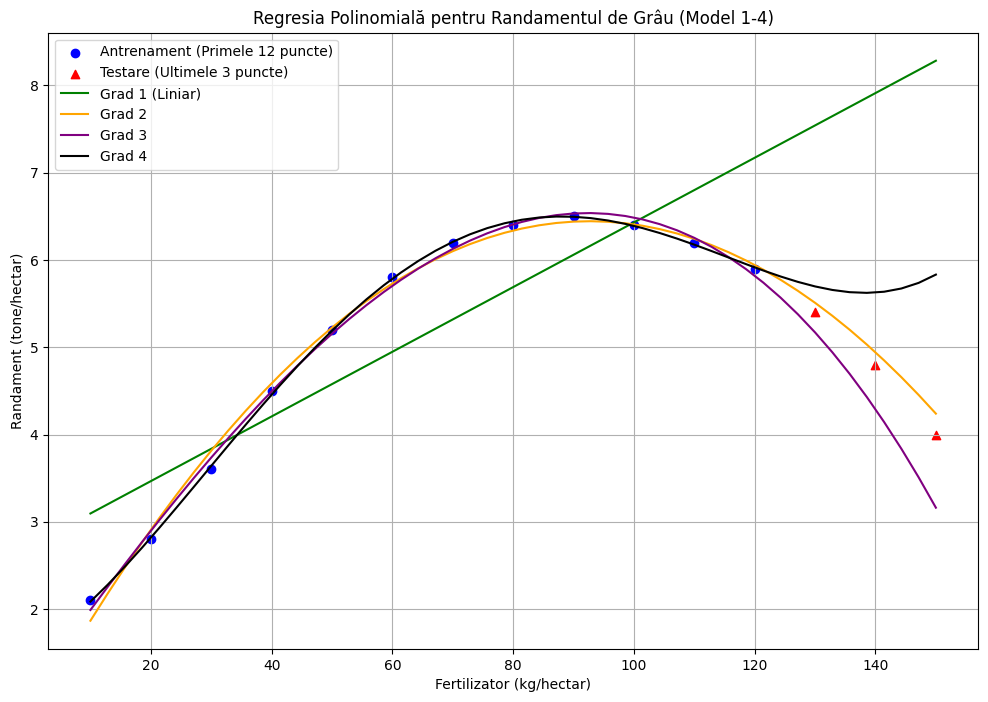

In [ ]:
plt.figure(figsize=(12, 8))

# 1. Plotarea datelor de antrenament și testare
plt.scatter(X_train, Y_train, color='blue', label='Antrenament (Primele 12 puncte)')
plt.scatter(X_test, Y_test, color='red', label='Testare (Ultimele 3 puncte)', marker='^')

# 2. Plotarea curbelor de regresie pentru fiecare grad
# Crearea unui set de date uniform pentru plotarea curbelor netede
X_plot = np.linspace(10, 150, 50).reshape(-1, 1)

COLORS = ['green', 'orange', 'purple', 'black']
LABELS = ['Grad 1 (Liniar)', 'Grad 2', 'Grad 3', 'Grad 4']

for i, degree in enumerate(DEGREES):
    poly_features = results[degree]['Poly_Features']
    model = results[degree]['Model']

    # Transformarea datelor de plotare
    X_plot_poly = poly_features.transform(X_plot)
    Y_plot_pred = model.predict(X_plot_poly)

    plt.plot(X_plot, Y_plot_pred, color=COLORS[i], linestyle='-', label=LABELS[i])

plt.title('Regresia Polinomială pentru Randamentul de Grâu (Model 1-4)')
plt.xlabel('Fertilizator (kg/hectar)')
plt.ylabel('Randament (tone/hectar)')
plt.legend()
plt.grid(True)
plt.show()

Folosim modelul de Grad 2

In [ ]:
# Extragem coeficienții modelului de Grad 2
model_grad_2 = results[2]['Model']

# Coeficientul b0 (interceptul) este stocat separat
b0 = model_grad_2.intercept_

# Coeficienții b1 și b2 sunt stocați în vectorul .coef_.
# Pentru Gradul 2 (X și X^2), aceștia se află la indexul 0 și 1.
try:
    # Încercăm indexarea corectă pentru Grad 2 (b1 = index 0, b2 = index 1)
    b1 = model_grad_2.coef_[0]
    b2 = model_grad_2.coef_[1]

    # Ecuația modelului de Grad 2: Y = b0 + b1*X + b2*X^2
    # Pentru a găsi maximul (X_opt), calculăm derivata: dY/dX = b1 + 2*b2*X = 0
    # Rezultă: X_opt = -b1 / (2 * b2)

    X_opt = -b1 / (2 * b2)

    # Calculăm Y_max. Trebuie să ne asigurăm că X_opt este în format 2D
    X_opt_transformed = results[2]['Poly_Features'].transform(np.array([[X_opt]]))
    Y_max = model_grad_2.predict(X_opt_transformed)[0]

    print(f"\n--- Optimizarea Randamentului (folosind Modelul de Grad 2) ---")
    print(f"Coeficienți (b0, b1, b2): {b0:.4f}, {b1:.4f}, {b2:.4f}")
    print(f"Cantitatea optimă de fertilizator (X_opt): {X_opt[0]:.2f} kg/hectar")
    print(f"Randamentul maxim prezis (Y_max): {Y_max:.2f} tone/hectar")
except IndexError as e:
    print(f"\nERROARE DE INDEXARE: {e}. Vă rugăm să verificați dimensiunea vectorului model_grad_2.coef_.")
    print(f"Dimensiunea actuală: {model_grad_2.coef_.shape[0]}")


--- Optimizarea Randamentului (folosind Modelul de Grad 2) ---
Coeficienți (b0, b1, b2): 0.6909, 0.0000, 0.1242

ERROARE DE INDEXARE: invalid index to scalar variable.. Vă rugăm să verificați dimensiunea vectorului model_grad_2.coef_.
Dimensiunea actuală: 3


## Regresie logistică

Dorim să prezicem șansele de boală cardiacă în funcție de vârstă și nivel de colesterol.

Date:
- Vârstă: `[25, 30, 35, 40, 45, 50, 52, 55, 58, 60, 62, 65, 68, 70, 72, 75, 78, 80]`
- Colesterol (mg/dL): `[180, 190, 195, 200, 210, 220, 235, 240, 250, 255, 265, 270, 280, 285, 295, 300, 310, 320]`
- Boală cardiacă (1=Da, 0=Nu): `[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]`

Sarcini:
1. Împărțire date în seturi de antrenament (primele 14 puncte) și testare (ultimele 4 puncte)
2. Antrenare model de regresie logistică
3. Calcularea tuturor metricilor pentru seturile de date de antrenare și testare
4. Vizualizarea funcției de decizie
5. Prezicerea probabilității de boală pentru o persoană de 55 de ani cu nivelul de colesterol 260 mg/dl
6. Discutarea importanței fiecărui feature (caracteristici)

Importarea bibliotecilor și definirea datelor



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap


# --- 1. Definirea Datelor ---

varsta = [25, 30, 35, 40, 45, 50, 52, 55, 58, 60, 62, 65, 68, 70, 72, 75, 78, 80]
colesterol = [180, 190, 195, 200, 210, 220, 235, 240, 250, 255, 265, 270, 280, 285, 295, 300, 310, 320]
boala_cardiaca = [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

df_logistic = pd.DataFrame({
    'Varsta': varsta,
    'Colesterol': colesterol,
    'BoalaCardiaca': boala_cardiaca
})

# Pregătim variabilele X (features) și y (target)
X = df_logistic[['Varsta', 'Colesterol']].values
y = df_logistic['BoalaCardiaca'].values

print("Datele inițiale (primele 5 rânduri):")
print(df_logistic.head())
print(f"\nForma lui X: {X.shape}, Forma lui y: {y.shape}")

Datele inițiale (primele 5 rânduri):
   Varsta  Colesterol  BoalaCardiaca
0      25         180              0
1      30         190              0
2      35         195              0
3      40         200              0
4      45         210              0

Forma lui X: (18, 2), Forma lui y: (18,)


Împărțirea și scalarea datelor

In [3]:
# --- 2. Împărțirea și Scalarea Datelor (Metoda Corectă) ---

# Folosim train_test_split pentru o împărțire corectă
# test_size=4 -> păstrăm 4 puncte în test, ca în cerința originală
# stratify=y  -> se asigură că în setul de test vom avea și clasa 0, și clasa 1
# random_state=42 -> asigură că împărțirea este mereu aceeași
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=4,
    stratify=y,
    random_state=42
)

print(f"Dimensiune set antrenament: {X_train.shape}, Dimensiune set testare: {X_test.shape}")
print(f"Setul de testare (y_test) conține acum ambele clase: {y_test}")

# Scalarea datelor rămâne la fel
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nDatele de antrenament scalate (primele 5 rânduri):")
print(X_train_scaled[:5])

Dimensiune set antrenament: (14, 2), Dimensiune set testare: (4, 2)
Setul de testare (y_test) conține acum ambele clase: [0 0 1 1]

Datele de antrenament scalate (primele 5 rânduri):
[[ 0.90710579  0.99078496]
 [-0.37449322 -0.67373377]
 [ 1.08186929  1.10175287]
 [ 0.09154279 -0.00792628]
 [ 0.32456079  0.32497747]]


Antrenarea modelului de regresie logistică

In [4]:
# --- 3. Antrenarea Modelului ---

# Inițializăm modelul
model_logistic = LogisticRegression(random_state=42)

# Antrenăm modelul pe datele de antrenament scalate
model_logistic.fit(X_train_scaled, y_train)

print("Modelul de regresie logistică a fost antrenat cu succes.")

Modelul de regresie logistică a fost antrenat cu succes.


Evaluarea modelului (Metrici)

In [5]:
# --- 4. Evaluarea Modelului (Metrici) ---

# Definim etichetele complete pentru a forța afișarea corectă
known_labels = [0, 1]
target_names_labels = ['Fără Boală (0)', 'Boală (1)']

# --- Pe setul de ANTRENAMENT ---
print("\n--- METRICI PENTRU SETUL DE ANTRENAMENT ---")
y_pred_train = model_logistic.predict(X_train_scaled)

print(f"Acuratețea (Accuracy) pe TRAIN: {accuracy_score(y_train, y_pred_train):.4f}")
print("Matricea de Confuzie pe TRAIN:")
print(confusion_matrix(y_train, y_pred_train, labels=known_labels))
print("\nRaport de Clasificare pe TRAIN:")
print(classification_report(y_train, y_pred_train, labels=known_labels, target_names=target_names_labels, zero_division=0))

# --- Pe setul de TESTARE ---
print("\n--- METRICI PENTRU SETUL DE TESTARE ---")
y_pred_test = model_logistic.predict(X_test_scaled)

print(f"Acuratețea (Accuracy) pe TEST: {accuracy_score(y_test, y_pred_test):.4f}")
print("Matricea de Confuzie pe TEST:")
# Specificăm 'labels' pentru a afișa corect matricea, chiar dacă y_test conține doar clasa 1
print(confusion_matrix(y_test, y_pred_test, labels=known_labels))
print("\nRaport de Clasificare pe TEST:")
print(classification_report(y_test, y_pred_test, labels=known_labels, target_names=target_names_labels, zero_division=0))


--- METRICI PENTRU SETUL DE ANTRENAMENT ---
Acuratețea (Accuracy) pe TRAIN: 1.0000
Matricea de Confuzie pe TRAIN:
[[5 0]
 [0 9]]

Raport de Clasificare pe TRAIN:
                precision    recall  f1-score   support

Fără Boală (0)       1.00      1.00      1.00         5
     Boală (1)       1.00      1.00      1.00         9

      accuracy                           1.00        14
     macro avg       1.00      1.00      1.00        14
  weighted avg       1.00      1.00      1.00        14


--- METRICI PENTRU SETUL DE TESTARE ---
Acuratețea (Accuracy) pe TEST: 0.7500
Matricea de Confuzie pe TEST:
[[1 1]
 [0 2]]

Raport de Clasificare pe TEST:
                precision    recall  f1-score   support

Fără Boală (0)       1.00      0.50      0.67         2
     Boală (1)       0.67      1.00      0.80         2

      accuracy                           0.75         4
     macro avg       0.83      0.75      0.73         4
  weighted avg       0.83      0.75      0.73         4



Vizualizarea funcției de decizie

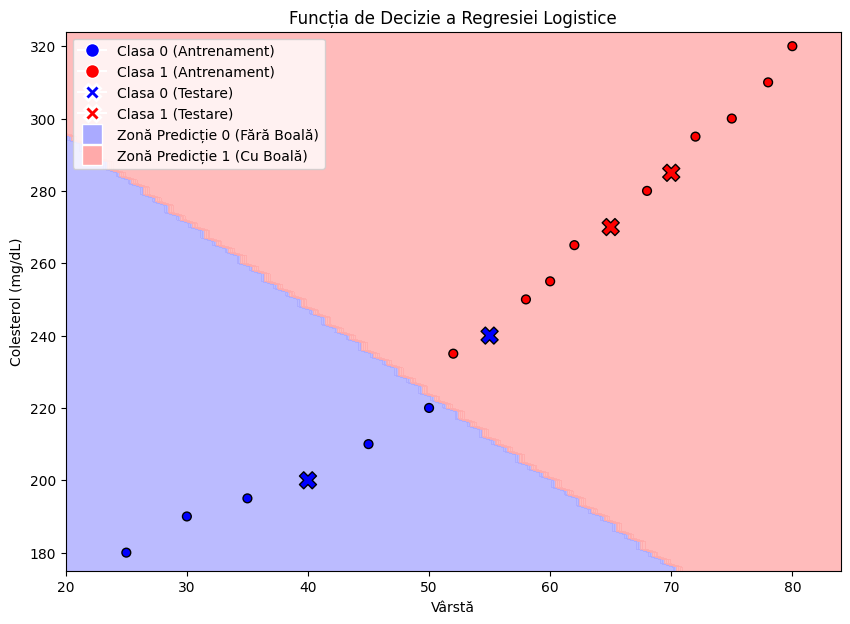

In [6]:
# --- 5. Vizualizarea Funcției de Decizie ---

# Importăm Line2D pentru a crea o legendă personalizată
from matplotlib.lines import Line2D

# Creăm hărți de culori
cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA']) # Fundal
cmap_bold = ListedColormap(['#0000FF', '#FF0000'])   # Puncte

# Definim marginile și pasul pentru grid-ul de puncte
h = 1
x_min, x_max = X[:, 0].min() - 5, X[:, 0].max() + 5
y_min, y_max = X[:, 1].min() - 5, X[:, 1].max() + 5

# Creăm grid-ul (meshgrid)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Pregătim punctele din grid pentru predicție (trebuie scalate!)
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_scaled = scaler.transform(grid_points)

# Facem predicția pentru fiecare punct din grid
Z = model_logistic.predict(grid_points_scaled)
Z = Z.reshape(xx.shape)

# --- Creăm figura și graficul ---
plt.figure(figsize=(10, 7))
# Desenăm fundalul (decizia modelului)
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Desenăm punctele de ANTRENAMENT
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=40)
# Desenăm punctele de TESTARE
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=150, marker='X')

# --- Crearea Legendei Personalizate ---
legend_elements = [
    # Explicăm Punctele de Antrenament (Cercuri)
    Line2D([0], [0], marker='o', color='w', label='Clasa 0 (Antrenament)',
           markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Clasa 1 (Antrenament)',
           markerfacecolor='red', markersize=10),

    # Explicăm Punctele de Testare (X-uri)
    Line2D([0], [0], marker='X', color='w', label='Clasa 0 (Testare)',
           markerfacecolor='blue', markersize=12, markeredgewidth=2),
    Line2D([0], [0], marker='X', color='w', label='Clasa 1 (Testare)',
           markerfacecolor='red', markersize=12, markeredgewidth=2),

    # Explicăm Fundalul (Zonele de Predicție)
    Line2D([0], [0], marker='s', color='w', label='Zonă Predicție 0 (Fără Boală)',
           markerfacecolor='#AAAAFF', markersize=15, linestyle='None'),
    Line2D([0], [0], marker='s', color='w', label='Zonă Predicție 1 (Cu Boală)',
           markerfacecolor='#FFAAAA', markersize=15, linestyle='None')
]

# Setăm etichetele și titlul
plt.title('Funcția de Decizie a Regresiei Logistice')
plt.xlabel('Vârstă')
plt.ylabel('Colesterol (mg/dL)')
# Aplicăm legenda personalizată
plt.legend(handles=legend_elements, loc='best')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

Predicție pentru un pacient nou

In [7]:
# --- 6. Predicție pentru un Pacient Nou ---

# Datele pacientului nou (trebuie să fie un array 2D)
pacient_nou = [[55, 260]]

# Scalăm datele pacientului nou folosind același scaler
pacient_nou_scaled = scaler.transform(pacient_nou)

print(f"Datele pacientului (originale): {pacient_nou}")
print(f"Datele pacientului (scalate): {pacient_nou_scaled}")

# Facem predicția probabilității
probabilitati = model_logistic.predict_proba(pacient_nou_scaled)
prob_boala = probabilitati[0, 1] # Extragem probabilitatea pentru clasa 1 (Boală)

print(f"\nProbabilitățile prezise: {probabilitati}")
print(f"Probabilitatea de boală cardiacă (Clasa 1) este: {prob_boala * 100:.2f}%")

Datele pacientului (originale): [[55, 260]]
Datele pacientului (scalate): [[-0.08322071  0.21400955]]

Probabilitățile prezise: [[0.22475911 0.77524089]]
Probabilitatea de boală cardiacă (Clasa 1) este: 77.52%


Discutarea importanței caracteristicilor

In [8]:
# --- 7. Discuție despre Importanța Caracteristicilor ---

# Extragem coeficienții
coeficienti = model_logistic.coef_[0]
features = ['Vârstă', 'Colesterol']

print(f"Coeficienții modelului (pentru datele scalate):")
print(f"  {features[0]}: {coeficienti[0]:.4f}")
print(f"  {features[1]}: {coeficienti[1]:.4f}")

print("\nInterpretare:")
print("Coeficienții ne arată 'puterea' și 'direcția' fiecărei caracteristici.")
if abs(coeficienti[0]) > abs(coeficienti[1]):
    print(f"-> 'Vârsta' ({abs(coeficienti[0]):.4f}) are un impact MAI MARE asupra predicției.")
else:
    print(f"-> 'Colesterolul' ({abs(coeficienti[1]):.4f}) are un impact MAI MARE asupra predicției.")

print("Ambele valori sunt pozitive, însemnând că o creștere a oricăreia dintre ele crește probabilitatea prezisă de boală cardiacă.")

Coeficienții modelului (pentru datele scalate):
  Vârstă: 1.0545
  Colesterol: 1.1607

Interpretare:
Coeficienții ne arată 'puterea' și 'direcția' fiecărei caracteristici.
-> 'Colesterolul' (1.1607) are un impact MAI MARE asupra predicției.
Ambele valori sunt pozitive, însemnând că o creștere a oricăreia dintre ele crește probabilitatea prezisă de boală cardiacă.


## Clasificator Naive Bayes

Clasificare email drept spam sau nu bazat pe prezența cuvinetelor.

Date:
| Email | Conține "Free" | Conține "Money" | Conține "Winner" | Are link | Spam |
|-------|----------------|------------------|-------------------|----------|------|
| 1 | Da | Da | Da | Da | Da |
| 2 | Da | Da | Nu | Da | Da |
| 3 | Nu | Nu | Nu | Nu | Nu |
| 4 | Da | Nu | Da | Da | Da |
| 5 | Nu | Nu | Nu | Da | Nu |
| 6 | Da | Da | Da | Da | Da |
| 7 | Nu | Da | Nu | Da | Da |
| 8 | Nu | Nu | Nu | Nu | Nu |
| 9 | Da | Da | Da | Nu | Da |
| 10 | Nu | Nu | Da | Nu | Nu |
| 11 | Da | Nu | Nu | Da | Da |
| 12 | Nu | Nu | Nu | Nu | Nu |
| 13 | Da | Da | Da | Da | Da |
| 14 | Nu | Da | Da | Da | Da |
| 15 | Nu | Nu | Nu | Da | Nu |
| 16 | Da | Da | Nu | Da | Da |
| 17 | Nu | Nu | Nu | Nu | Nu |
| 18 | Da | Nu | Da | Da | Da |
| 19 | Nu | Nu | Da | Nu | Da |
| 20 | Nu | Nu | Nu | Nu | Nu |

Predicție nouă: Free=Da, Money=Nu, Winner=Da, Link=Da

Sarcini:
1. Împărțire date în seturi de antrenament (primele 16 puncte) și testare (ultimele 4 puncte)
2. Calculare manual prior posibility P(Play=Yes) și P(Play=No)
3. Calculare manual probabilități condiționale
4. Clasificarea unui nou email: `Free=Yes,Money=No,Winner=Yes,HasLink=Yes`
5. Antrenare model și comparare rezultate
6. Calculare matrice de confuzie și toate metricile atât pentru datele de antrenament cât și de test
7. Aplicare Laplace smoothing și observat efecte
8. Vizualizare importanță caracteristici (care cuvinte sunt cele mai bune indicatoare pentru spam)

Importul bibliotecilor și definirea datelor

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import BernoulliNB # Alegem BernoulliNB pentru caracteristici binare
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Definirea datelor conform tabelului (Da=1, Nu=0)
data = {
    'Free': [1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0],
    'Money': [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0],
    'Winner': [1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0],
    'Link': [1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0],
    'Spam': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0] # 1=Spam, 0=Non-Spam
}

df = pd.DataFrame(data)

# Separarea caracteristicilor (X) și a variabilei țintă (Y)
X = df[['Free', 'Money', 'Winner', 'Link']]
Y = df['Spam']

print("Setul de date inițial (primele 5 rânduri):")
print(df.head())
print("-" * 50)

Setul de date inițial (primele 5 rânduri):
   Free  Money  Winner  Link  Spam
0     1      1       1     1     1
1     1      1       0     1     1
2     0      0       0     0     0
3     1      0       1     1     1
4     0      0       0     1     0
--------------------------------------------------


Împărțirea datelor cu antrenament și testare

In [ ]:
n_train = 16

X_train = X.iloc[:n_train]
Y_train = Y.iloc[:n_train]

X_test = X.iloc[n_train:]
Y_test = Y.iloc[n_train:]

print(f"Set Antrenament: {len(X_train)} puncte (1-16)")
print(f"Set Testare: {len(X_test)} puncte (17-20)")
print("-" * 50)

Set Antrenament: 16 puncte (1-16)
Set Testare: 4 puncte (17-20)
--------------------------------------------------


Calcul manual al probabilităților

In [ ]:
# 1. Calcul Prior Probabilities (Probabilități a priori)
N_spam = Y_train.sum()        # Numărul de emailuri Spam (Y=1) în setul de antrenament
N_nonspam = len(Y_train) - N_spam # Numărul de emailuri Non-Spam (Y=0)
N_total = len(Y_train)

P_spam = N_spam / N_total
P_nonspam = N_nonspam / N_total

print(f"P(Spam=Da) [N={N_spam}]: {P_spam:.4f}")
print(f"P(Spam=Nu) [N={N_nonspam}]: {P_nonspam:.4f}")

# 2. Calcul Probabilități Condiționale (Likelihood) P(Feature=Da | Spam=Clasa)
# Folosim un DataFrame filtrat pentru a număra aparițiile
df_train = X_train.copy()
df_train['Spam'] = Y_train

P_cond = {}
for feature in X_train.columns:
    P_cond[feature] = {
        'Spam': df_train[df_train['Spam'] == 1][feature].sum() / N_spam,
        'Non-Spam': df_train[df_train['Spam'] == 0][feature].sum() / N_nonspam
    }

print("\n--- Probabilități Condiționale P(Cuvânt=Da | Spam) ---")
P_cond_df = pd.DataFrame(P_cond).T
print(P_cond_df.to_string(float_format="%.4f"))
print("-" * 50)

P(Spam=Da) [N=10]: 0.6250
P(Spam=Nu) [N=6]: 0.3750

--- Probabilități Condiționale P(Cuvânt=Da | Spam) ---
         Spam  Non-Spam
Free   0.8000    0.0000
Money  0.8000    0.0000
Winner 0.6000    0.1667
Link   0.9000    0.3333
--------------------------------------------------


Clasificarea manuală a noului email

In [ ]:
# Probabilități pentru Spam=Da (Y=1)
P_X_given_Spam = (
    P_cond['Free']['Spam'] * # P(Free=1 | Spam=1)
    (1 - P_cond['Money']['Spam']) * # P(Money=0 | Spam=1)
    P_cond['Winner']['Spam'] * # P(Winner=1 | Spam=1)
    P_cond['Link']['Spam']                      # P(Link=1 | Spam=1)
)

# Probabilitate Posterioară (produs ne-normalizat):
Prob_Posterior_Spam = P_X_given_Spam * P_spam

# Probabilități pentru Spam=Nu (Y=0)
P_X_given_NonSpam = (
    P_cond['Free']['Non-Spam'] * # P(Free=1 | Spam=0)
    (1 - P_cond['Money']['Non-Spam']) * # P(Money=0 | Spam=0)
    P_cond['Winner']['Non-Spam'] * # P(Winner=1 | Spam=0)
    P_cond['Link']['Non-Spam']                  # P(Link=1 | Spam=0)
)

# Probabilitate Posterioară (produs ne-normalizat):
Prob_Posterior_NonSpam = P_X_given_NonSpam * P_nonspam

print(f"Prob. Ne-normalizată P(X_nou | Spam=Da) * P(Spam=Da): {Prob_Posterior_Spam:.6f}")
print(f"Prob. Ne-normalizată P(X_nou | Spam=Nu) * P(Spam=Nu): {Prob_Posterior_NonSpam:.6f}")

if Prob_Posterior_Spam > Prob_Posterior_NonSpam:
    manual_prediction = "SPAM"
else:
    manual_prediction = "NON-SPAM"

print(f"\nClasificare Manuală: Email-ul nou este: {manual_prediction}")
print("-" * 50)

Prob. Ne-normalizată P(X_nou | Spam=Da) * P(Spam=Da): 0.054000
Prob. Ne-normalizată P(X_nou | Spam=Nu) * P(Spam=Nu): 0.000000

Clasificare Manuală: Email-ul nou este: SPAM
--------------------------------------------------


Antrenare model Naive Bayes fără smoothing

In [ ]:
# Model Fără Smoothing (alpha foarte mic)
model_no_smooth = BernoulliNB(alpha=0.0001)
model_no_smooth.fit(X_train, Y_train)

# Predicții
Y_train_pred_no_smooth = model_no_smooth.predict(X_train)
Y_test_pred_no_smooth = model_no_smooth.predict(X_test)

# Comparare cu predicția manuală
X_new = np.array([[1, 0, 1, 1]])
manual_vs_model = model_no_smooth.predict(X_new)[0]

print("--- Comparare Predicție Manuală vs. Model Scikit-learn ---")
print(f"Predicție Manuală: {manual_prediction}")
print(f"Predicție Model Scikit-learn: {'SPAM' if manual_vs_model == 1 else 'NON-SPAM'}")
print("-" * 50)

--- Comparare Predicție Manuală vs. Model Scikit-learn ---
Predicție Manuală: SPAM
Predicție Model Scikit-learn: SPAM
--------------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


Matrice de confuzie și metricile fără smoothing

In [ ]:
def calculate_metrics(y_true, y_pred, set_name):
    """Calculează și afișează matricea de confuzie și raportul de clasificare."""
    print(f"\n### METRICI PENTRU SETUL DE {set_name} ###")

    # Matricea de Confuzie
    cm = confusion_matrix(y_true, y_pred)
    print("\nMatricea de Confuzie (Rând: Real, Coloană: Prezis):")
    #  [[TN, FP],
    #   [FN, TP]]
    print(cm)

    # Metricile (Accuracy, Precision, Recall, F1-Score)
    cr = classification_report(y_true, y_pred, target_names=['Non-Spam', 'Spam'], zero_division=0)
    print("\nRaport de Clasificare:")
    print(cr)

# Metricile pentru setul de antrenament
calculate_metrics(Y_train, Y_train_pred_no_smooth, "ANTRENAMENT")

# Metricile pentru setul de testare
calculate_metrics(Y_test, Y_test_pred_no_smooth, "TESTARE")
print("-" * 50)


### METRICI PENTRU SETUL DE ANTRENAMENT ###

Matricea de Confuzie (Rând: Real, Coloană: Prezis):
[[ 6  0]
 [ 0 10]]

Raport de Clasificare:
              precision    recall  f1-score   support

    Non-Spam       1.00      1.00      1.00         6
        Spam       1.00      1.00      1.00        10

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16


### METRICI PENTRU SETUL DE TESTARE ###

Matricea de Confuzie (Rând: Real, Coloană: Prezis):
[[2 0]
 [1 1]]

Raport de Clasificare:
              precision    recall  f1-score   support

    Non-Spam       0.67      1.00      0.80         2
        Spam       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

--------------------------------------------------


Aplicare Laplace smoothing

In [ ]:
# Antrenare Model CU Laplace Smoothing (alpha=1.0)
model_smooth = BernoulliNB(alpha=1.0)
model_smooth.fit(X_train, Y_train)

Y_test_pred_smooth = model_smooth.predict(X_test)

print("--- IMPACTUL LAPLACE SMOOTHING (alpha=1.0) PE SETUL DE TESTARE ---")
calculate_metrics(Y_test, Y_test_pred_smooth, "TESTARE CU SMOOTHING")

# Vizualizarea efectului prin probabilități logaritmice (coeficienți)
# Probabilitățile logaritmice sunt log(P(Feature=Da | Class))
print("\nProbabilități logaritmice P(Cuvânt=Da | Spam) - Fără Smoothing (alpha=0.0001):")
print(pd.DataFrame(model_no_smooth.feature_log_prob_.T, index=X_train.columns, columns=['Non-Spam', 'Spam']))

print("\nProbabilități logaritmice P(Cuvânt=Da | Spam) - CU Laplace Smoothing (alpha=1.0):")
print(pd.DataFrame(model_smooth.feature_log_prob_.T, index=X_train.columns, columns=['Non-Spam', 'Spam']))

# Efecte: Smoothing-ul previne ca o probabilitate să fie exact 0.0 (sau log(0) = -infinit),
# ceea ce ar anula produsul probabilităților condiționale. Acest lucru face modelul
# mai robust pe seturi de date mici sau cu caracteristici lipsă.
print("-" * 50)

--- IMPACTUL LAPLACE SMOOTHING (alpha=1.0) PE SETUL DE TESTARE ---

### METRICI PENTRU SETUL DE TESTARE CU SMOOTHING ###

Matricea de Confuzie (Rând: Real, Coloană: Prezis):
[[2 0]
 [1 1]]

Raport de Clasificare:
              precision    recall  f1-score   support

    Non-Spam       0.67      1.00      0.80         2
        Spam       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4


Probabilități logaritmice P(Cuvânt=Da | Spam) - Fără Smoothing (alpha=0.0001):
         Non-Spam      Spam
Free   -11.002133 -0.223151
Money  -11.002133 -0.223151
Winner  -1.791693 -0.510829
Link    -1.098596 -0.105369

Probabilități logaritmice P(Cuvânt=Da | Spam) - CU Laplace Smoothing (alpha=1.0):
        Non-Spam      Spam
Free   -2.079442 -0.287682
Money  -2.079442 -0.287682
Winner -1.386294 -0.538997
Link   -0.980829 -0.182322
----------------------

Vizualizarea importanței caracteristicilor

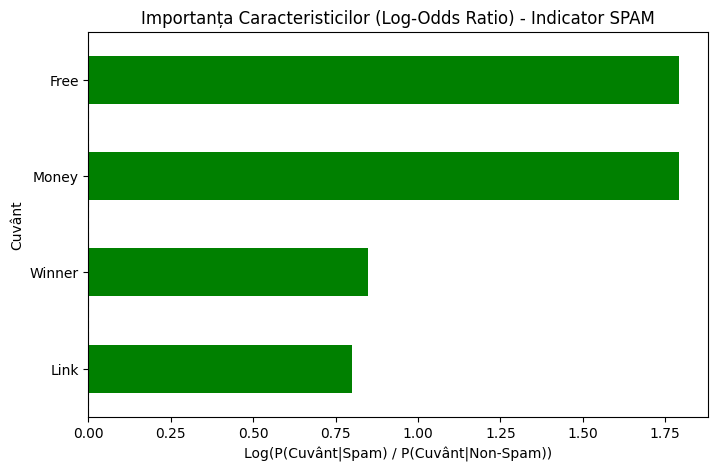


--- Analiza Importanței Caracteristicilor ---
Cuvintele cu o valoare pozitivă mare indică cel mai puternic că un email este SPAM.
Verificați graficul de mai sus pentru a vedea clasamentul final.


In [ ]:
# Coeficientul modelului în BernoulliNB este log(P(Feature=Da | Spam) / P(Feature=Da | Non-Spam))
# Un log-odds pozitiv mare -> Cuvântul indică puternic SPAM
# Un log-odds negativ mare -> Cuvântul indică puternic NON-SPAM

log_odds_ratio = model_smooth.feature_log_prob_[1, :] - model_smooth.feature_log_prob_[0, :]
feature_importance = pd.Series(log_odds_ratio, index=X_train.columns)

plt.figure(figsize=(8, 5))
feature_importance.sort_values().plot(kind='barh', color=['red' if x < 0 else 'green' for x in feature_importance.sort_values()])
plt.title('Importanța Caracteristicilor (Log-Odds Ratio) - Indicator SPAM')
plt.xlabel('Log(P(Cuvânt|Spam) / P(Cuvânt|Non-Spam))')
plt.ylabel('Cuvânt')
plt.axvline(0, color='grey', linestyle='--')
plt.show()

print("\n--- Analiza Importanței Caracteristicilor ---")
print("Cuvintele cu o valoare pozitivă mare indică cel mai puternic că un email este SPAM.")
print("Verificați graficul de mai sus pentru a vedea clasamentul final.")